In [3]:
# Multiple Linear Regression
# source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
#
# y = b0 + [b1 X1] + [b2 X2] + ... + [bn Xn] + e
# where:
#       y : response, dependent variable
#       [X1, X2, ..., Xn]: predictor, X variable, features
#       e : random error (noise)

In [4]:
# Linear regression involving multiple variables is called 
#  “multiple linear regression” or multivariate linear regression. 
#
# The steps to perform multiple linear regression are almost 
# similar to that of simple linear regression. The difference 
# lies in the evaluation.

In [5]:
# Data:
#
# $ head -7 winequality-red.csv
#fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
#7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
#7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
#7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
#11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
#7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
#7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5

In [6]:
# What are we doing?
# What to predict?

# We will take into account various input features like fixed acidity, 
# volatile acidity, citric acid, residual sugar, chlorides, free sulfur 
# dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. 
#
# Based on these features we will predict the quality of the wine.

In [8]:
#import all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [9]:
# Create Data Set
# The following command imports the dataset from 
# the file you downloaded from Kaggle
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/download
dataset = pd.read_csv('winequality-red.csv')

In [10]:
len(dataset)

1599

In [11]:
dataset.shape

(1599, 12)

In [12]:
# It gives (1599, 12) as output which means 
# our dataset has 1599 rows and 12 columns.

In [13]:
# To see the statistical details of the dataset, 
# we can use describe():
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
# Clean data set:
# Let us clean our data little bit, So first check 
# which are the columns the contains NaN values in it :
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [16]:
# HOW TO CLEAN:
# Once the above code is executed, all the columns should give False, 
# In case for any column you find True result, then remove all the 
# null values from that column using below code.

#### => dataset = dataset.fillna(method='ffill')

In [17]:
# Create X and y
#
# Our next step is to divide the data into “attributes” and “labels”. 
# X variable contains all the attributes/features and y variable contains labels.
#
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

In [18]:
len(X)

1599

In [19]:
len(y)

1599

In [21]:
# Check average value of quality (y)
#
# Let's check the average value of the “quality” column.
#
# plt.figure(figsize=(15,10))
# plt.tight_layout()
# seabornInstance.distplot(dataset['quality'])

In [23]:
# NOTE:
# As we can observe that most of the time the value (y = Quality of Wine) is either 5 or 6.
# see reference:
#   https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f


In [24]:
# SPLIT DATA: Training & Test

# Next, we split 80% of the data to the training set 
# while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
len(X_train)

1279

In [26]:
len(y_train)

1279

In [27]:
len(X_test)

320

In [28]:
len(y_test)

320

In [29]:
# Build a Linear Regression Model with many features
# Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# in the case of multivariable linear regression, 
# the regression model has to find the most optimal 
# coefficients for all the attributes. To see what 
# coefficients our regression model has chosen, 
# execute the following script:
#
# You can not use the following, since X does not have column names
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['coefficient']) 

coeff_df = pd.DataFrame(regressor.coef_, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol'], columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [34]:
# These are B1, B2, B3, ...

# What does it mean?
# This means that for a unit increase in “density”, 
# there is a decrease of 31.51 units in the quality 
# of the wine. 

# Similarly, a unit decrease in “Chlorides“ results 
# in an increase of 1.87 units in the quality of the wine. 
# 
# We can see that the rest of the features have very little 
# effect on the quality of the wine.


In [35]:
# Prediction

# Now let's do prediction on test data.
y_pred = regressor.predict(X_test)


In [36]:
# Check the difference between 
# the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [37]:
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


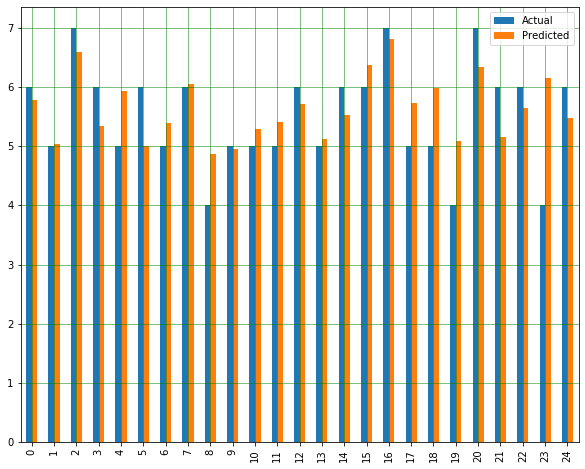

In [38]:
#Now let's plot the comparison of Actual and Predicted values
#
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
# Good Results

In [43]:
# performance of the algorithm
#
# The final step is to evaluate the performance of the algorithm. 
# We’ll do this by finding the values for MAE, MSE, and RMSE. 
# Execute the following script:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661103
Mean Squared Error: 0.38447119782012373
Root Mean Squared Error: 0.6200574149384263


In [44]:
# You can see that the value of root mean squared error is 0.62, 
# which is slightly greater than 10% of the mean value which is 5.63. 
# This means that our algorithm was not very accurate but can still 
# make reasonably good predictions.
#
#  What are the factors?
# There are many factors that may have contributed 
# to this inaccuracy, for example :
#
# 1. Need more data: We need to have a huge amount of data 
#    to get the best possible prediction.
#
# 2. Bad assumptions: We made the assumption that this data 
#    has a linear relationship, but that might not be the case. 
#    Visualizing the data may help you determine that.
#
# 3. Poor features: The features we used may not have had a 
#    high enough correlation to the values we were trying to predict.


In [45]:
# Conclusion
# In this demo, we studied the most fundamental machine learning algorithms 
# i.e. linear regression. We implemented both simple linear regression and 
# multiple linear regression with the help of the Scikit-Learn machine 
# learning library.